In [2]:
import cv2, matplotlib.pyplot as plt, numpy as np, os

In [3]:
IMAGE_PATH = './PoVeKamon/Images/'

OBJECT_PATH = IMAGE_PATH + 'Object/'

DATA_PATH = IMAGE_PATH + 'Data/'

object = [cv2.imread(OBJECT_PATH + img) for img in os.listdir(OBJECT_PATH)]

data = [cv2.imread(DATA_PATH + img) for img in os.listdir(DATA_PATH)]

In [5]:
akaze = cv2.AKAZE_create()

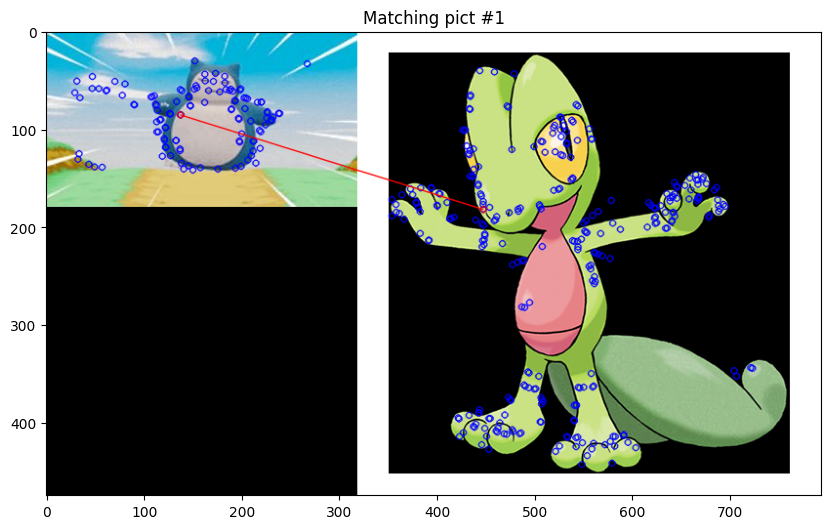

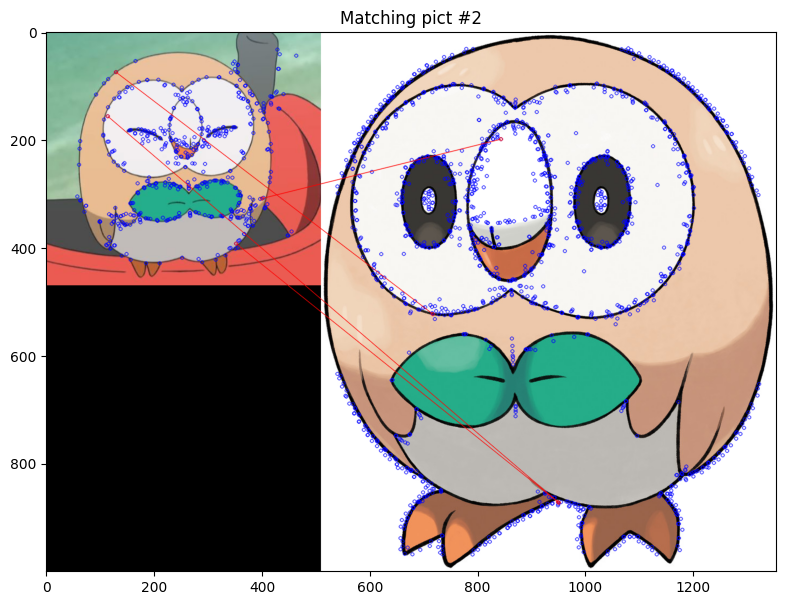

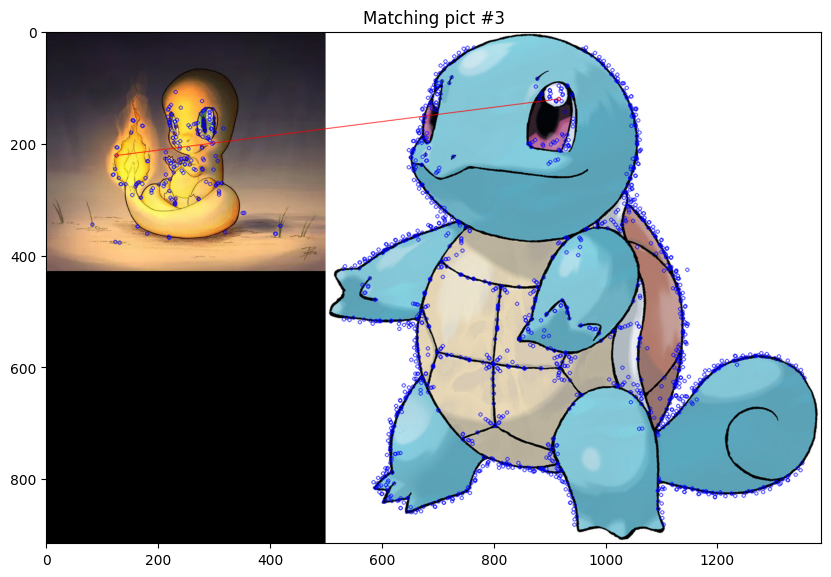

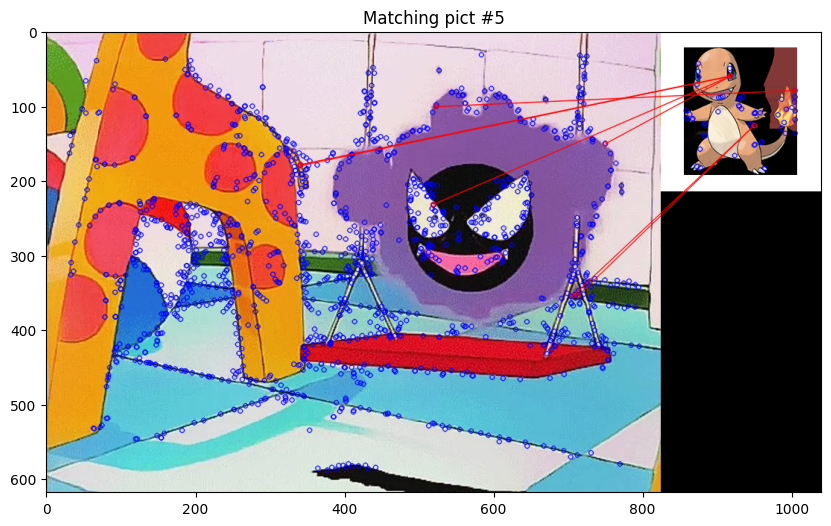

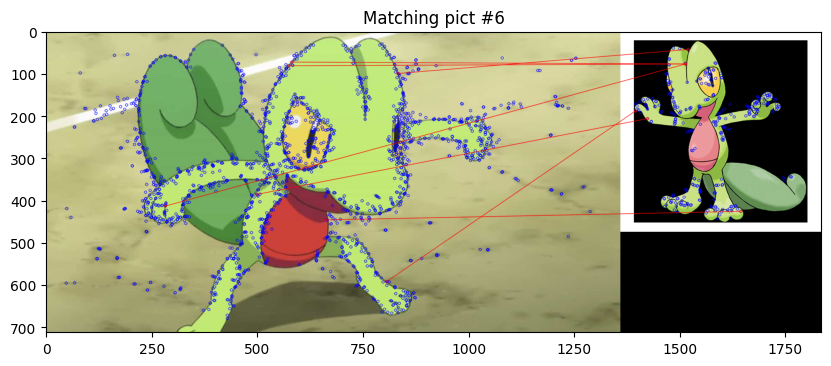

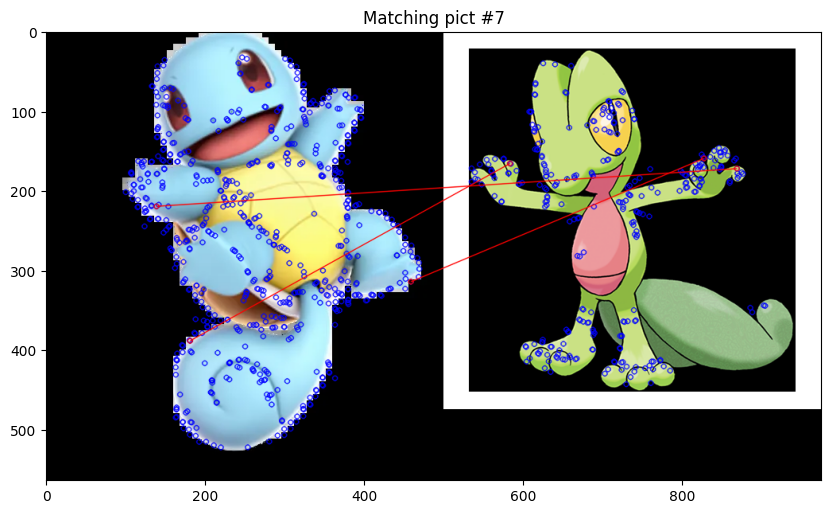

In [17]:
for index, img in enumerate(object):
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    gray_img = cv2.equalizeHist(gray_img)

    gray_img = cv2.medianBlur(gray_img, 5)

    object_keypoint, object_descriptor = akaze.detectAndCompute(gray_img, None)
    
    object_descriptor = np.float32(object_descriptor)

    best_matches = 0
    best_matches_data = None
    result = None

    for i, data_img in enumerate(data):

        if data_img is None:
            continue
        data_img = cv2.cvtColor(data_img, cv2.COLOR_BGR2RGB)

        gray_data = cv2.cvtColor(data_img, cv2.COLOR_RGB2GRAY)

        gray_data = cv2.equalizeHist(gray_data)

        gray_data = cv2.GaussianBlur(gray_data, (3,3), 0)

        data_keypoint, data_descriptor = akaze.detectAndCompute(gray_data, None)

        data_descriptor = np.float32(data_descriptor)
        flann = cv2.FlannBasedMatcher(dict(algorithm = 1), dict(checks = 100))

        match = flann.knnMatch(object_descriptor, data_descriptor, 2)

        matchesmask = [[0,0] for _ in range(len(match))]

        current_matches = 0
        for j, (fm, sm) in enumerate(match):
            if fm.distance < 0.7 * sm.distance:
                matchesmask[j] = [1,0]
                current_matches +=1 

        if best_matches < current_matches:
            best_matches = current_matches

            best_matches_data = {
                "images" : data_img,
                "keypoint": data_keypoint,
                "descriptor":data_descriptor,
                "matches":match,
                "matchesmask":matchesmask
            }
    if best_matches_data is None:
        continue
    result = cv2.drawMatchesKnn(
        img, 
        object_keypoint, 
        best_matches_data['images'],
        best_matches_data['keypoint'],
        matches1to2=best_matches_data['matches'],
        outImg=None,
        matchColor=[255, 0, 0],
        singlePointColor=[0, 0, 255],
        matchesMask=best_matches_data['matchesmask']
    )

    plt.figure(figsize=(10,7))

    plt.imshow(result)

    plt.title(f"Matching pict #{index+1}")

    plt.show()





